# New section

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Colab Notebooks/kaggle_dataset'

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/kaggle_dataset

/content/gdrive/MyDrive/Colab Notebooks/kaggle_dataset


In [ ]:
!ls

the-oxfordiiit-pet-dataset


In [ ]:
!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset

100% 1.47G/1.48G [00:25<00:00, 45.2MB/s]
100% 1.48G/1.48G [00:25<00:00, 61.9MB/s]


In [ ]:
!mkdir the-oxfordiiit-pet-dataset
!mv the-oxfordiiit-pet-dataset.zip the-oxfordiiit-pet-dataset

In [ ]:
%cd the-oxfordiiit-pet-dataset/

/content/the-oxfordiiit-pet-dataset/the-oxfordiiit-pet-dataset/the-oxfordiiit-pet-dataset


In [ ]:
!unzip the-oxfordiiit-pet-dataset

Streaming output truncated to the last 5000 lines.
  inflating: images/images/leonberger_81.jpg  
  inflating: images/images/leonberger_82.jpg  
  inflating: images/images/leonberger_83.jpg  
  inflating: images/images/leonberger_84.jpg  
  inflating: images/images/leonberger_85.jpg  
  inflating: images/images/leonberger_86.jpg  
  inflating: images/images/leonberger_87.jpg  
  inflating: images/images/leonberger_88.jpg  
  inflating: images/images/leonberger_89.jpg  
  inflating: images/images/leonberger_9.jpg  
  inflating: images/images/leonberger_90.jpg  
  inflating: images/images/leonberger_91.jpg  
  inflating: images/images/leonberger_92.jpg  
  inflating: images/images/leonberger_93.jpg  
  inflating: images/images/leonberger_94.jpg  
  inflating: images/images/leonberger_95.jpg  
  inflating: images/images/leonberger_96.jpg  
  inflating: images/images/leonberger_97.jpg  
  inflating: images/images/leonberger_98.jpg  
  inflating: images/images/leonberger_99.jpg  
  inflatin

Code practiced from this link : https://towardsdatascience.com/build-your-first-cnn-with-tensorflow-a9d7394eaa2e

In [ ]:
#What is import glob?
#glob (short for global) is used to return all file paths that match a specific pattern. We can use glob to search for a specific file pattern, or perhaps more usefully, search for files where the filename matches a certain pattern by using wildcard characters

In [ ]:

import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
#What is image data generator for keras used for?
#Keras ImageDataGenerator is a gem! It lets you augment your images in real-time while your model is still training! You can apply any random transformations on each training image as it is passed to the model. This will not only make your model robust but will also save up on the overhead memory!

In [ ]:
print(tf.__version__, keras.__version__)

2.8.2 2.8.0


In [28]:
print('There are {} images in the dataset'.format(len(glob.glob('images/*.jpg'))))

There are 7390 images in the dataset


In [29]:

CATS = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']

cats_images=[]
dogs_images=[]

for img in glob.glob('images/*.jpg'):
  if any(cat in img for cat in CATS):
    cats_images.append(img)
  else:
    dogs_images.append(img)

In [30]:

print('There are {} images of cats'.format(len(cats_images)))
print('There are {} images of dogs'.format(len(dogs_images)))

There are 2400 images of cats
There are 4990 images of dogs


In [31]:
#shuffle the lists
np.random.shuffle(cats_images)
np.random.shuffle(dogs_images)

#split the data into train, validation and test sets
train_d, val_d, test_d = np.split(dogs_images, [int(len(dogs_images)*0.7), int(len(dogs_images)*0.8)])
train_c, val_c, test_c = np.split(cats_images, [int(len(cats_images)*0.7), int(len(cats_images)*0.8)])

In [ ]:
print(train_d.shape,val_d.shape,test_d.shape)

(3493,) (499,) (998,)


In [32]:
train_dog_df = pd.DataFrame({'image':train_d, 'label':'dog'})
val_dog_df = pd.DataFrame({'image':val_d, 'label':'dog'})
test_dog_df = pd.DataFrame({'image':test_d, 'label':'dog'})

train_cat_df = pd.DataFrame({'image':train_c, 'label':'cat'})
val_cat_df = pd.DataFrame({'image':val_c, 'label':'cat'})
test_cat_df = pd.DataFrame({'image':test_c, 'label':'cat'})

In [33]:
train_df = pd.concat([train_dog_df, train_cat_df])
val_df = pd.concat([val_dog_df, val_cat_df])
test_df = pd.concat([test_dog_df, test_cat_df])

In [34]:
print('There are {} images for training'.format(len(train_df)))
print('There are {} images for validation'.format(len(val_df)))
print('There are {} images for testing'.format(len(test_df)))

There are 5173 images for training
There are 739 images for validation
There are 1478 images for testing


In [36]:
#Preprocess the images
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

Image datagenertor blog analytics vidya: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [37]:
#rescale the images
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

#convert them into a dataset
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="binary",
  x_col="image",
  y_col="label",
  batch_size=BATCH_SIZE,
  seed=42,
  shuffle=True,
  target_size=(IMG_HEIGHT,IMG_WIDTH) #set the height and width of the images
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='binary',
  x_col="image",
  y_col="label",
  batch_size=BATCH_SIZE,
  seed=42,
  shuffle=True,
  target_size=(IMG_HEIGHT,IMG_WIDTH)
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='binary',
  x_col="image",
  y_col="label",
  batch_size=BATCH_SIZE,
  seed=42,
  shuffle=True,
  target_size=(IMG_HEIGHT,IMG_WIDTH)
)
    

Found 5173 validated image filenames belonging to 2 classes.
Found 739 validated image filenames belonging to 2 classes.
Found 1478 validated image filenames belonging to 2 classes.


In [38]:
images, labels = next(iter(testDataset))

In [39]:
print('Batch shape: ', images.shape)
print('Label shape: ', labels.shape)

Batch shape:  (32, 224, 224, 3)
Label shape:  (32,)


Label:  1.0


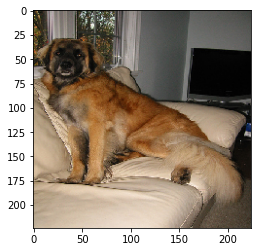

In [40]:

plt.imshow(images[3])
print('Label: ', labels[3])

In [41]:
#build the model
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [42]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [43]:
#Train the model
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:

epochs=1

#train the model
history = model.fit(trainDataset, epochs=epochs, validation_data=(valDataset))

162/162 [==============================] - 1762s 11s/step - loss: 0.6170 - accuracy: 0.6739 - val_loss: 0.5896 - val_accuracy: 0.6752


In [45]:
#evaluate the model on the test dataset
loss, acc = model.evaluate(testDataset)

47/47 [==============================] - 146s 3s/step - loss: 0.5974 - accuracy: 0.6752


In [46]:
print('Loss:', loss)
print('Accuracy:', acc)

Loss: 0.5974012613296509
Accuracy: 0.6752368211746216


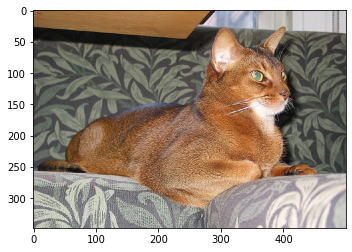

In [54]:
img = plt.imread('/content/the-oxfordiiit-pet-dataset/the-oxfordiiit-pet-dataset/the-oxfordiiit-pet-dataset/images/Abyssinian_156.jpg')
plt.imshow(img)

In [ ]:
def preprocess(image):
    img_resize = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    img_norm = img_resize / 255
    return img_norm

img = tf.reshape(img, (-1, IMG_HEIGHT, IMG_HEIGHT, 3))
img = preprocess(img)
model.predict(img)